# Car Price Prediction

### Objectives:
- Building a model to predict the price of used cars in Saudi Arabia based on the given data.
- Understand which variables are significant in predicting the price of the used cars.
- Comparing different ML models, and find the best one among them.

In [1]:
# Import required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To change Scientific Notation to Decimal Format
pd.options.display.float_format = '{:.1f}'.format


# Step 1: Reading & Understanding the Data

In [2]:
# Read the dataset
data = pd.read_csv('UsedCarsSA.csv')

# To check the number of rows and cols
print('Shape:', data.shape)

Shape: (8035, 13)


In [3]:
# Check datatype for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


### Variable Describtion

- `Make` : Name of the car company

- `Model`: Name of a car product
- `Year` : Year of Manufacturing
- `Origin`: Country of importer (Gulf / Saudi / Other)
- `Color`: Color of the used car
- `Options`: Full Options / Semi-Full / Standard
- `Engine_Size`: The engine size of used car
- `Fuel_Type`: Fuel type size of used car (Diesel / Gas / Hybrid)
- `Gear_Type`: Automatic / Manual
- `Mileage`: The average distance that a vehicle can travel on (in km)
- `Region`: The region in which the used car was offered for sale
- `Price`: Price of the used car (in SAR)
- `Negotiable`: If True, the price is 0. This means the price is negotiable (not set)


 `Price` will be our target column because we want to predict it. The other columns will be our predictor variables that predict the price.

# Step 2: Data Cleaning and Preparation

In [4]:
# Checking for duplicated rows

print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  3


In [5]:
# Drop duplicate rows

data.drop_duplicates(inplace=True)

print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  0


In [6]:
# Check for missing values

data.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

### Renaming unclear columns

`Type`  column is  confusing to read, it means "Car Model". So, I will change it `Model` to improves the readability of the dataset.

In [7]:
data = data.rename(columns={"Type": "Model"})
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


### Dropping irrelevant columns

In [8]:
# 'Negotiable' column is not necessary for analysis, so I will delete it
data = data.drop(['Negotiable'], axis=1)
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500


In [9]:
# Summary Statistics for numerical attrubires 
data.describe()

,Year,Engine_Size,Mileage,Price
count,8032.0,8032.0,8032.0,8032.0
mean,2014.1,3.3,149152.8,53699.2
std,5.8,1.5,347512.2,71993.9
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,37000.0,0.0
50%,2016.0,3.0,101785.5,37000.0
75%,2018.0,4.4,195000.0,73625.0
max,2022.0,9.0,20000000.0,1150000.0


Notice that `Mileage` has maximum value of **20,000,000**. This is not possible! Also, for `Price` column, we notice that **25%** of the values are **zero**. In a later step, I'm going to deal with these extreme values.

In [10]:
# Summary Statistics for categorical variables
data.describe(exclude="number")

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region
count,8032,8032,8032,8032,8032,8032,8032,8032
unique,59,381,4,15,3,3,2,27
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh
freq,2037,372,5961,3477,3191,7858,6968,3236


`Toyota Land Cruiser` is the most selling car, and `White` is most preferable color. For car sales, `Riyadh` is the most popular city.

In [11]:
# To check rows with Price represented as'0'.
data[data.Price == 0]

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0


In [12]:
# Dropping the rows having price equal to zero
data = data[data['Price'] != 0]
data.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000
11,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000


To check the values in `price` column. Let's sort the colunm in an ascending order.

In [13]:
data.sort_values(by='Price', ascending=1, inplace=True)
data.head(20)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884
7233,Toyota,Yaris,2019,Saudi,White,Standard,1.6,Gas,Automatic,85000,Najran,950
1661,MG,5,2020,Saudi,White,Standard,1.5,Gas,Automatic,41000,Al-Ahsa,988
7665,Hyundai,Elantra,2019,Saudi,Grey,Standard,2.0,Gas,Automatic,89000,Jeddah,993
3009,GMC,Yukon,2021,Saudi,Another Color,Standard,5.3,Gas,Automatic,4000,Jeddah,1000
4277,Toyota,Corolla,2020,Saudi,Silver,Standard,1.6,Gas,Automatic,48563,Hail,1002


We can clearly notice that there is values that seems not realistic to consider as a car price. In order to not skew the results, I decided to drop the rows that contains price less that 5000 Riyal.

In [14]:
data = data[data['Price'] > 5000]
data.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000
5038,Mercury,Grand Marquis,2001,Other,Blue,Semi Full,4.6,Gas,Automatic,33000,Riyadh,6000
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500
2809,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500
6928,Suzuki,D'max,2001,Other,White,Full,1.0,Diesel,Manual,1000,Jeddah,7000


Also, I will drop the values that exceeds 700,000 km in Mileage column, for the same reason.

In [15]:
data = data[data['Mileage'] < 700000]
data.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000
5038,Mercury,Grand Marquis,2001,Other,Blue,Semi Full,4.6,Gas,Automatic,33000,Riyadh,6000
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500
2809,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500
6928,Suzuki,D'max,2001,Other,White,Full,1.0,Diesel,Manual,1000,Jeddah,7000


# Step 3: Visualizing the Data

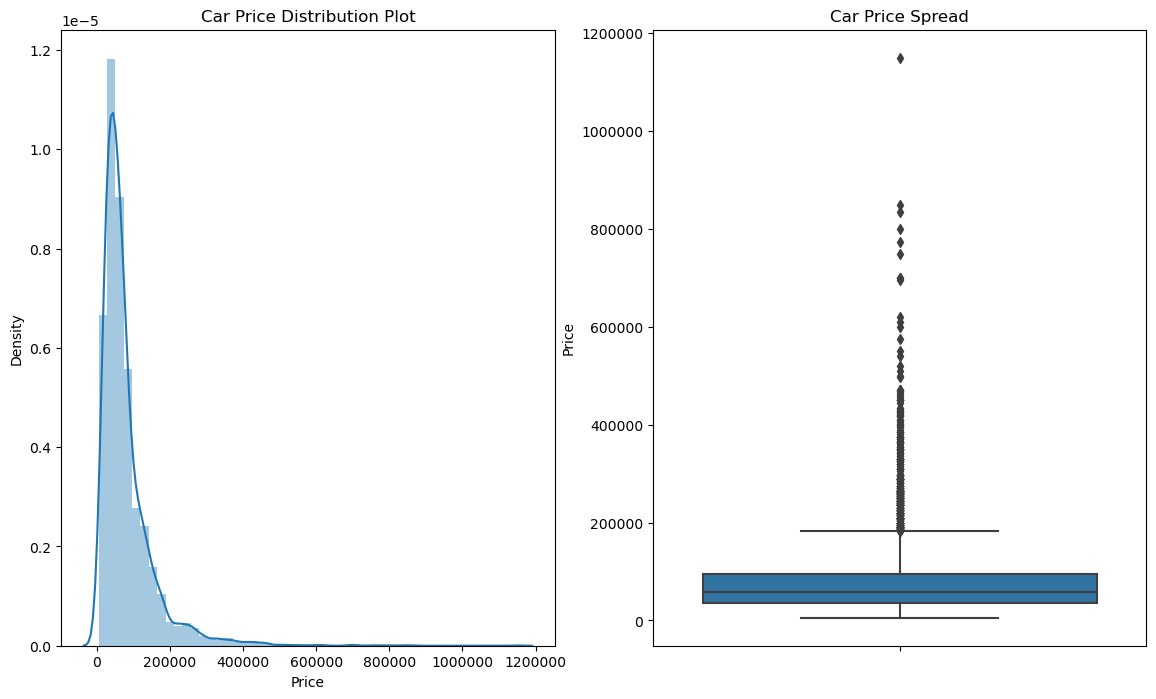

In [16]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [17]:
print(data.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      5376.0
mean      80015.7
std       75086.0
min        5500.0
25%       36500.0
50%       59000.0
75%       95000.0
85%      130000.0
90%      155000.0
100%    1150000.0
max     1150000.0
Name: Price, dtype: float64


#### Insights :
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are relatively low (Below 95,000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices. (85% of the prices are below 130,000, whereas the remaining 15% are between 130,000 and 1,150,000 SAR)

In [18]:
# View all categorical variables

categorical_columns = data.select_dtypes(include=['object'])
categorical_columns.head()

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region
7624,Mercedes,SEL,Saudi,Silver,Full,Gas,Automatic,Tabouk
5565,Other,Other,Other,Yellow,Semi Full,Gas,Manual,Jeddah
1208,Kia,Optima,Other,White,Standard,Gas,Manual,Taef
5038,Mercury,Grand Marquis,Other,Blue,Semi Full,Gas,Automatic,Riyadh
2063,Ford,Marquis,Saudi,White,Standard,Gas,Automatic,Aseer


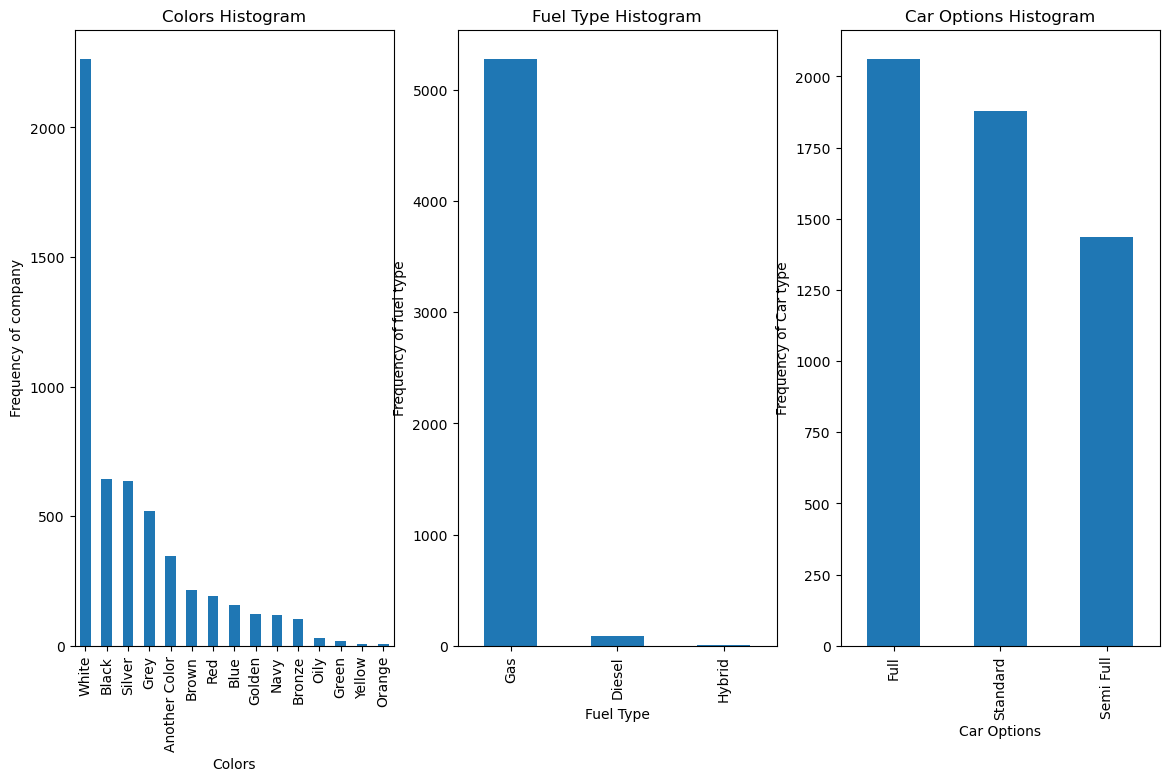

In [19]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt1 = data.Color.value_counts().plot(kind='bar')
plt.title('Colors Histogram')
plt1.set(xlabel = 'Colors', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.Options.value_counts().plot(kind='bar')
plt.title('Car Options Histogram')
plt1.set(xlabel = 'Car Options', ylabel='Frequency of Car type')

plt.show()

**Insights:**
- `White` is the most flavorable `color` for buyers. 
- Number of `Gas` fueled cars is very high compared to `Diesel` cars.
- `Full` Option cars seems to be more preferable for car sales than other options.

Text(0, 0.5, 'Count of Cars')

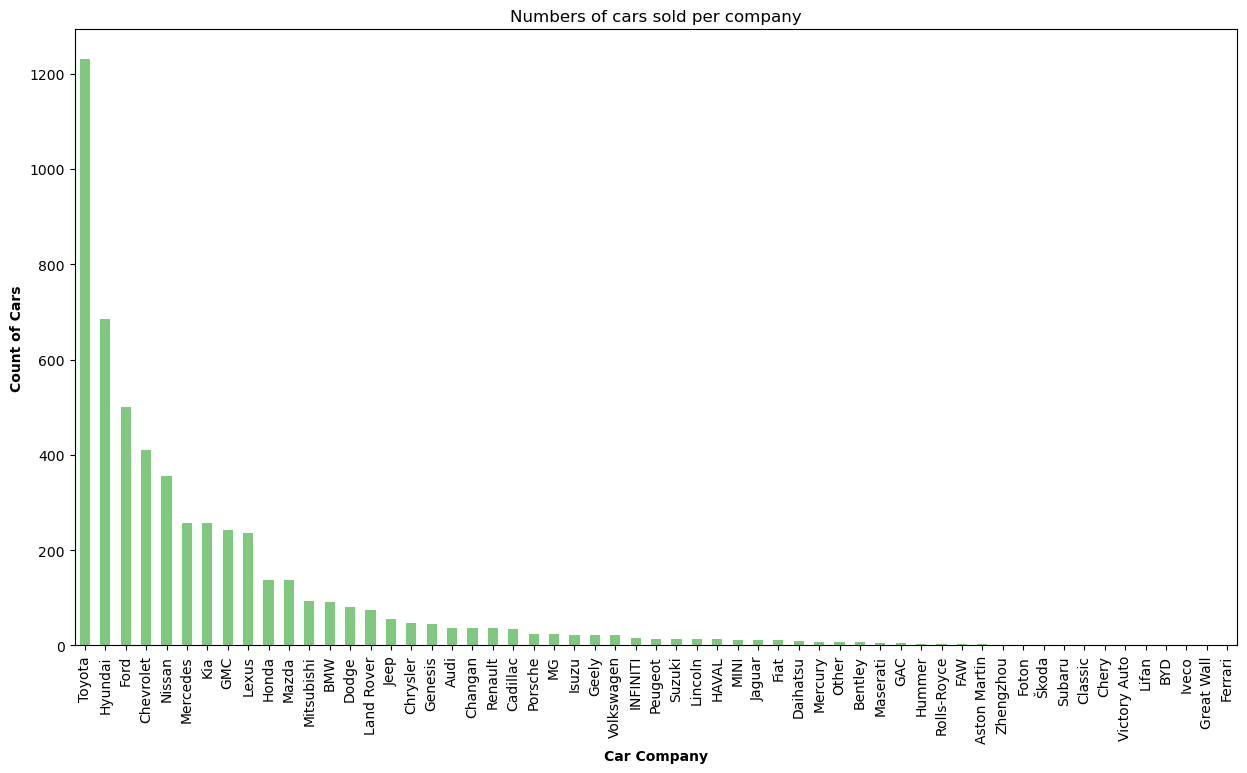

In [20]:
# Visualizing the different car company names available

plt.rcParams['figure.figsize'] = [15,8]
ax = data['Make'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

#### Insights:

- `Toyota`, `Hyundai`, and `Ford` are among the most cars sold as used cars.

- `Ferrari`, `Great Wall`, and `Victory Auto` are the lowest sold cars.

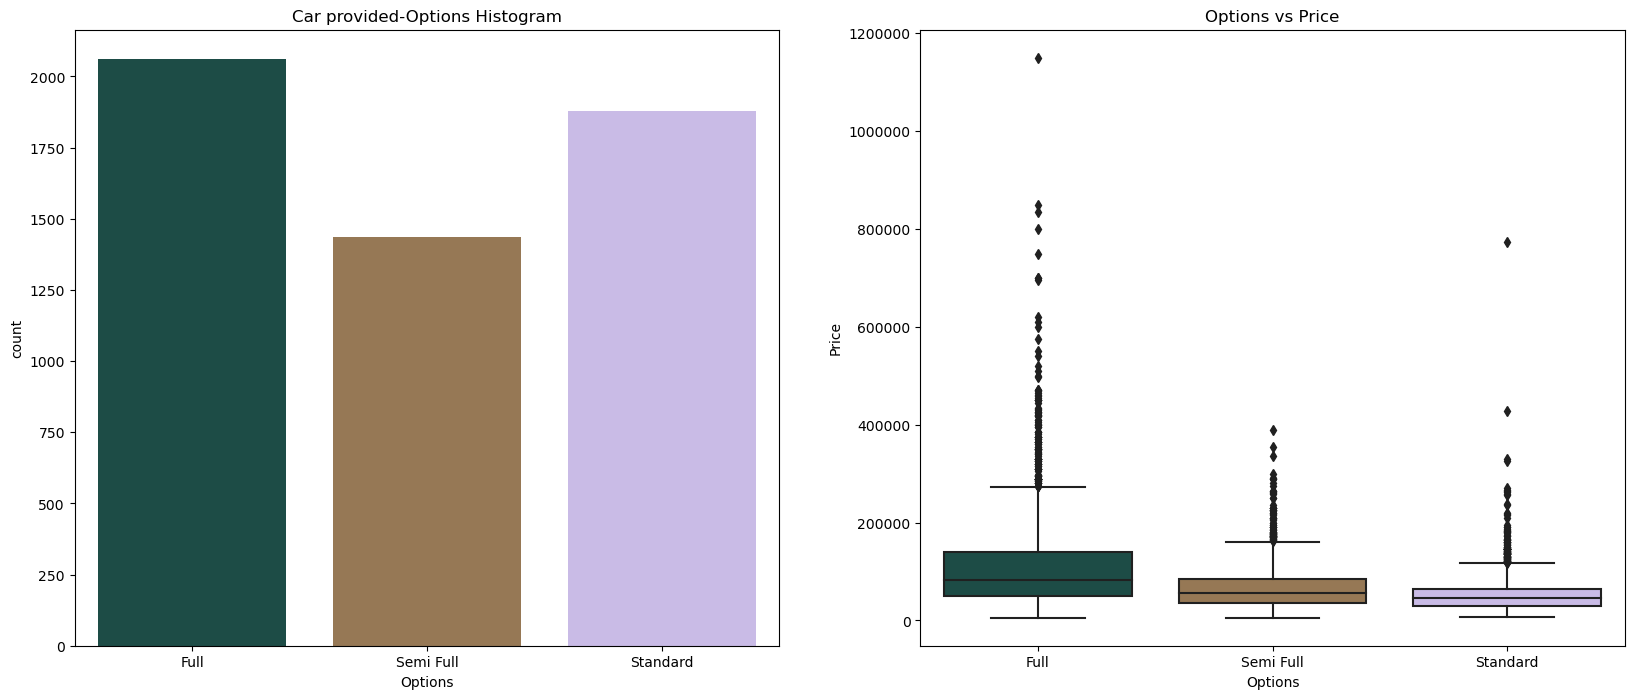

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car provided-Options Histogram')
sns.countplot(x='Options', data=data, palette="cubehelix")  # Added x= and data=

plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x='Options', y='Price', data=data, palette="cubehelix")  # Added data=

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

`Full Option` cars has higher spread out in price compared to the other options.

<Figure size 2000x800 with 0 Axes>

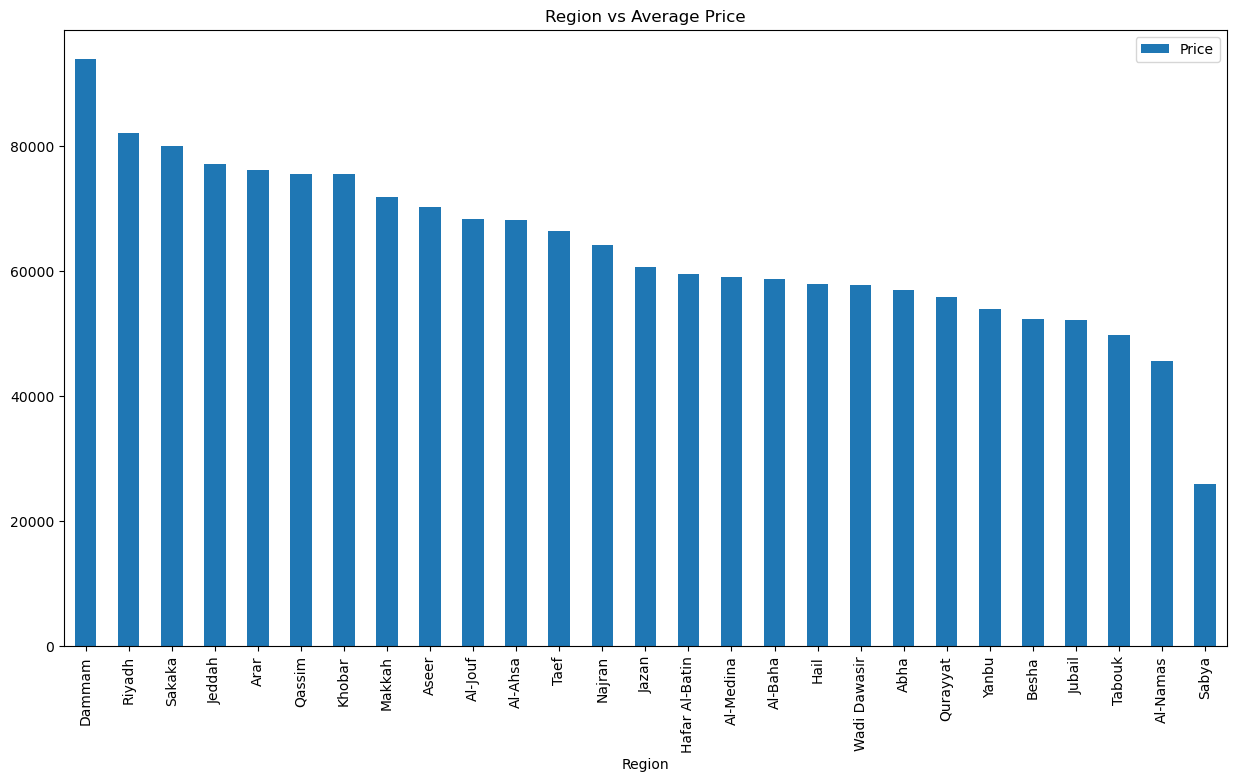

In [22]:
plt.figure(figsize=(20,8))

df = pd.DataFrame(data.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Region vs Average Price')
plt.show()

`Dammam`, `Riyadh`, and `Sakaka` cities where the cars are moslty sold.

<Figure size 2500x600 with 0 Axes>

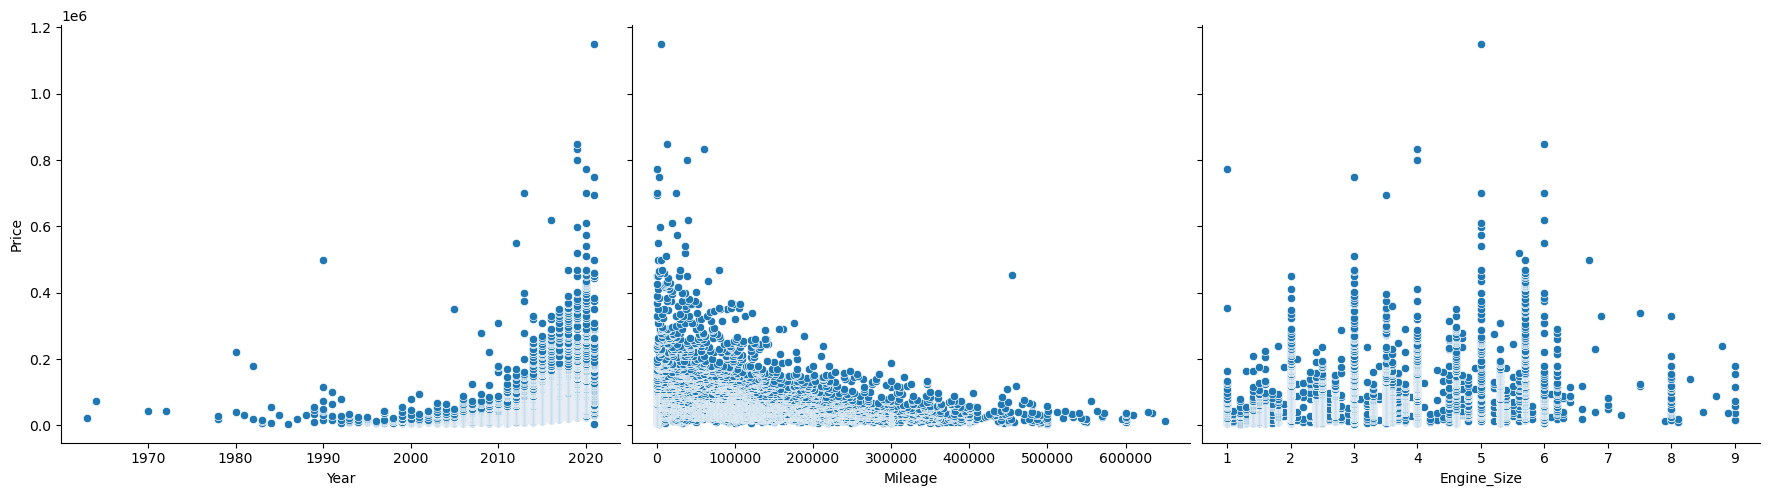

In [23]:
plt.figure(figsize=(25, 6))
sns.pairplot(data, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

#### Inference:
- `Year` of manufacting seems to have a positive correlation with `price`, which is expected.

- `Mileage` appears to have a negative correlation with `price`. 
- `Engine_Size` have a week correlation with the `price`.

<Figure size 2000x600 with 0 Axes>

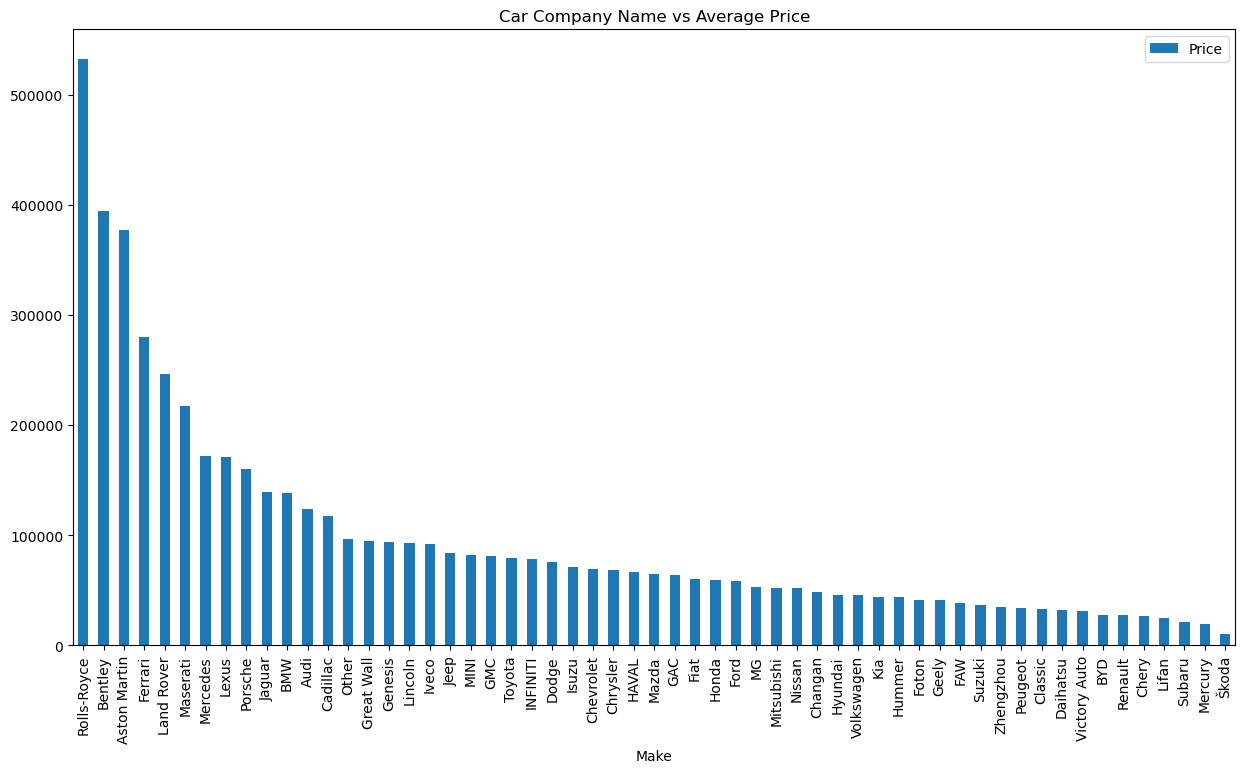

In [24]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(data.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `Skoda`, `Mercury`, and `Subaru` are cheapest sold cars.
- `Rolls-Royce`, `Bentley`, and `Aston Martin` have the highest average price.


### Correlation Map

For correlation map, if the value is near to (-1) that means there is negative corrolation between values. For example: `Milage` and `Year`. Naturally, the Milage is increases as the car is driven. Similarly if the value near to (1) that means there is positive corrolation between values.

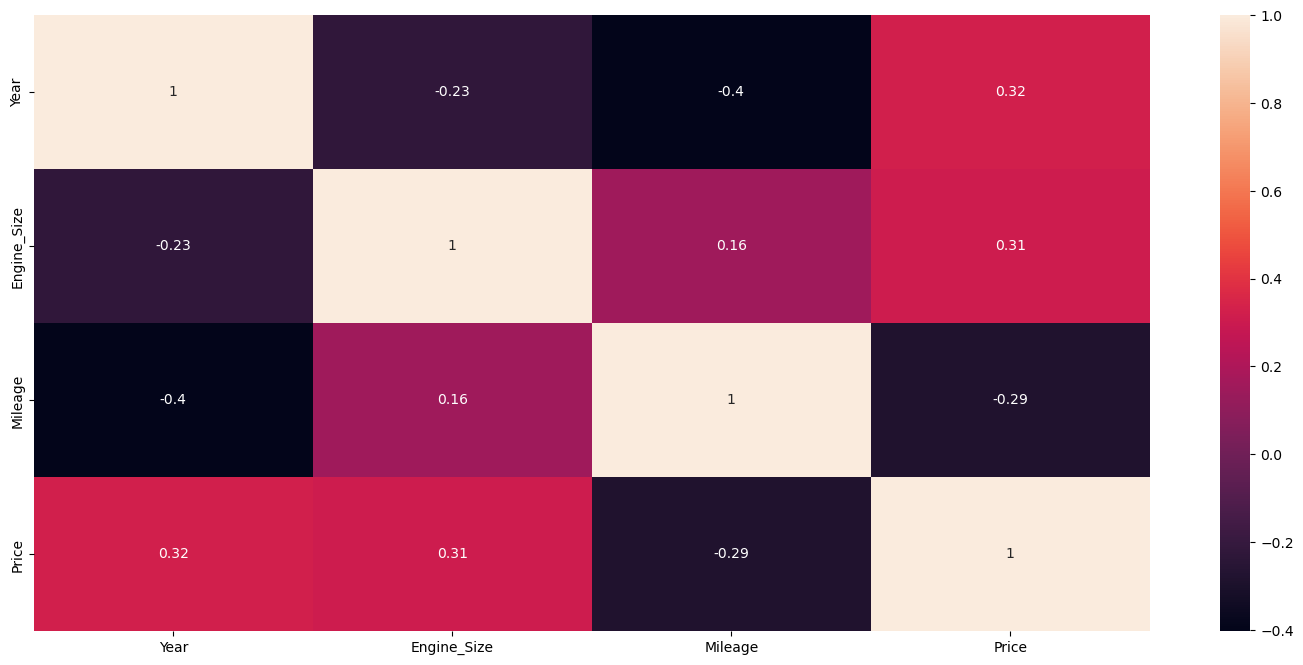

In [25]:
# to check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(18,8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.show()

From the heatmap, we can see the `Option`, `Year`, and `Engine_Size` are positively correlated variables to `price`. Whereas `Mileage` is negatively correlated.


**List of Significant Variables after Visual Analysis:**

- Year
- Make (Car Company)
- Engine Size
- Mileage
- Gear Type
- Car Options
- Color
- Price


# Step 4: Featue Engineering

### Converting categorical variables into integers 

In [26]:
# Take only significat variables
data_sig = data[['Make','Year', 'Color', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

In [27]:
data_sig

,Make,Year,Color,Options,Engine_Size,Gear_Type,Mileage,Price
7624,Mercedes,1986,Silver,Full,3.0,Automatic,500000,5500
5565,Other,2021,Yellow,Semi Full,1.2,Manual,3000,5500
1208,Kia,2006,White,Standard,1.3,Manual,290000,6000
5038,Mercury,2001,Blue,Semi Full,4.6,Automatic,33000,6000
2063,Ford,2001,White,Standard,4.6,Automatic,350000,6000
...,...,...,...,...,...,...,...,...
3182,Bentley,2020,Black,Standard,1.0,Automatic,300,772500
4038,Mercedes,2019,Black,Full,4.0,Automatic,39000,800000
3826,Mercedes,2019,Grey,Full,4.0,Automatic,60000,835000
5913,Bentley,2019,Another Color,Full,6.0,Automatic,13000,850000


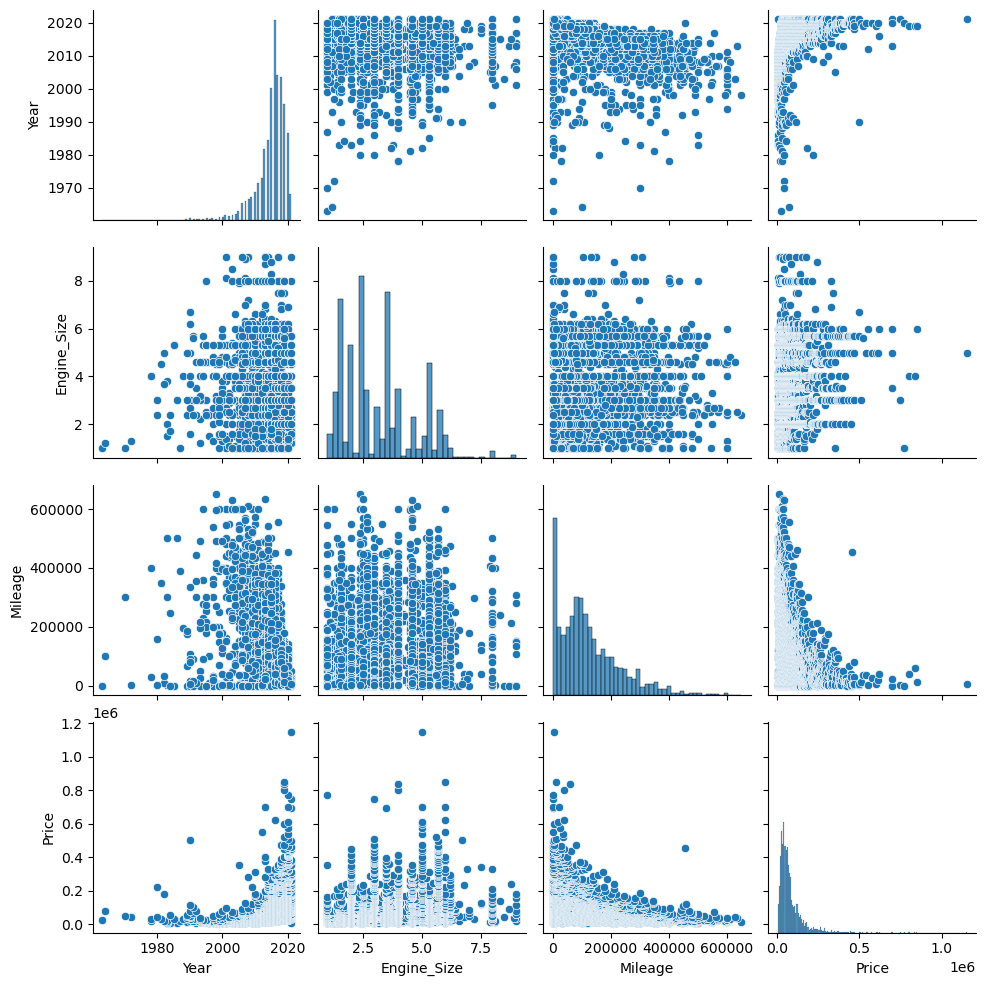

In [28]:
# plot relationships in the dataset
sns.pairplot(data_sig)
plt.show()

In [29]:
cat_col = ['Color', 'Options', 'Gear_Type', 'Make'] # Categorical Valiables

# Get the dummy variables for the categorical feature and store it in a new variable 'dummies'

dummies = pd.get_dummies(data_sig[cat_col])
dummies.shape

(5376, 77)

In [30]:
# Add the results to the original dataframe

data_sig = pd.concat([data_sig, dummies], axis = 1)
data_sig.shape

(5376, 85)

In [31]:
# Drop the original cat variables as dummies are already created

data_sig.drop(cat_col, axis = 1, inplace = True)
data_sig.shape

(5376, 81)

<!-- from sklearn.model_selection import train_test_split

cars_train, cars_test = train_test_split(cars_sig, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_col = ['Year', 'Engine_Size', 'Mileage', 'Price']
cars_train[num_col] = scaler.fit_transform(cars_train[num_col]) -->

# Step 5: Model Building & Machine Learning

In [32]:
# Import libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Splitting dataset into Traing and Testing sets

In [33]:
from sklearn.model_selection import train_test_split

X = data_sig.drop(['Price'] , axis=1)
y = data_sig['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

### Linear Regression Model

In [34]:
model = LinearRegression()

model.fit(X_train, y_train)
preds_lm_test = model.predict(X_test)


### Model Evaluation

In [35]:
# Now lets see if our model is good
print(r2_score(y_test, preds_lm_test))

0.5535689178329858


The accuracy in Random Forest model (R-Squared) is 55%

### Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestRegressor


reg_forest = RandomForestRegressor(random_state=42, criterion='squared_error')
reg_forest.fit(X_train, y_train)  # fit the model

preds_forest_test = reg_forest.predict(X_test)# predict the price in test dataset

### Model Evaluation

In [37]:
# Now lets see if our model is good

from sklearn.metrics import r2_score
print(r2_score(y_test, preds_forest_test))

0.8007538677851856


The accuracy for Random Forest model (R-Squared) is 80%